## Hands-on - Visualisation

In [2]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import shapiro

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/World-happiness-report-updated_2024.csv"

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")
print(df.head(5))
print(df.describe())

Dataset Preview:
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative a

### **Question 1: Create a histogram of the 'Life Ladder'**
#### Hint: Use plt.hist() or sns.histplot() to show distribution of a single variable

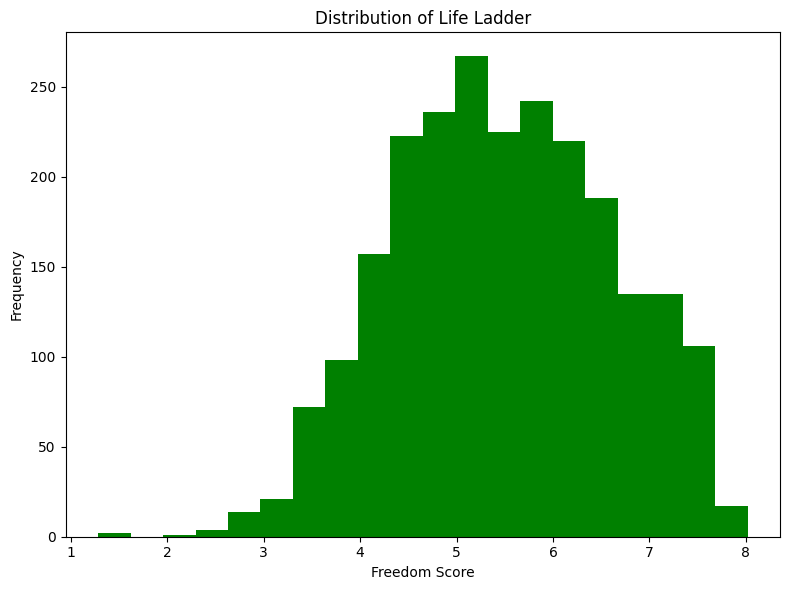

In [ ]:
plt.figure(figsize=(8, 6)) 

# Plot histogram with 20 bins and green color
plt.hist(df['Life Ladder'], bins=20, color='green')

# Add title and axis labels
plt.title('Distribution of Life Ladder')
plt.xlabel('Freedom Score')
plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### **Question 2: Create a scatter plot of 'Log GDP per capita' vs 'Life Ladder'**
#### Hint: Use sns.scatterplot(x=..., y=...) or plt.scatter()

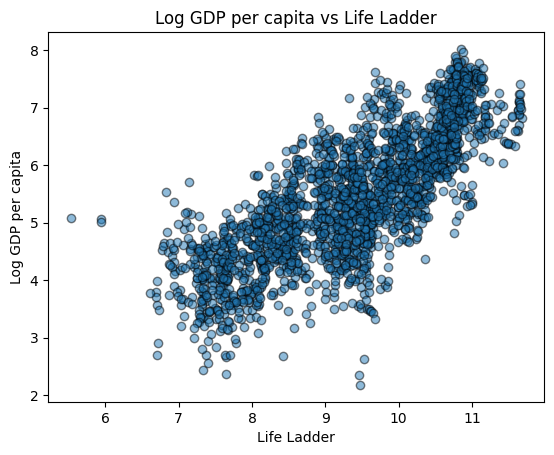

In [ ]:
plt.scatter(df['Life Ladder'], df['Log GDP per capita'], alpha=0.5, edgecolors = 'black')
plt.xlabel("Life Ladder")
plt.ylabel("Log GDP per capita")
plt.title("Log GDP per capita vs Life Ladder")
plt.show()

### **Question 3: Create a box plot to show distribution of 'Life Ladder' by 'year'**
#### Hint: Use sns.boxplot(x='Regional indicator', y='Life Ladder', data=df) and rotate x-labels for readability

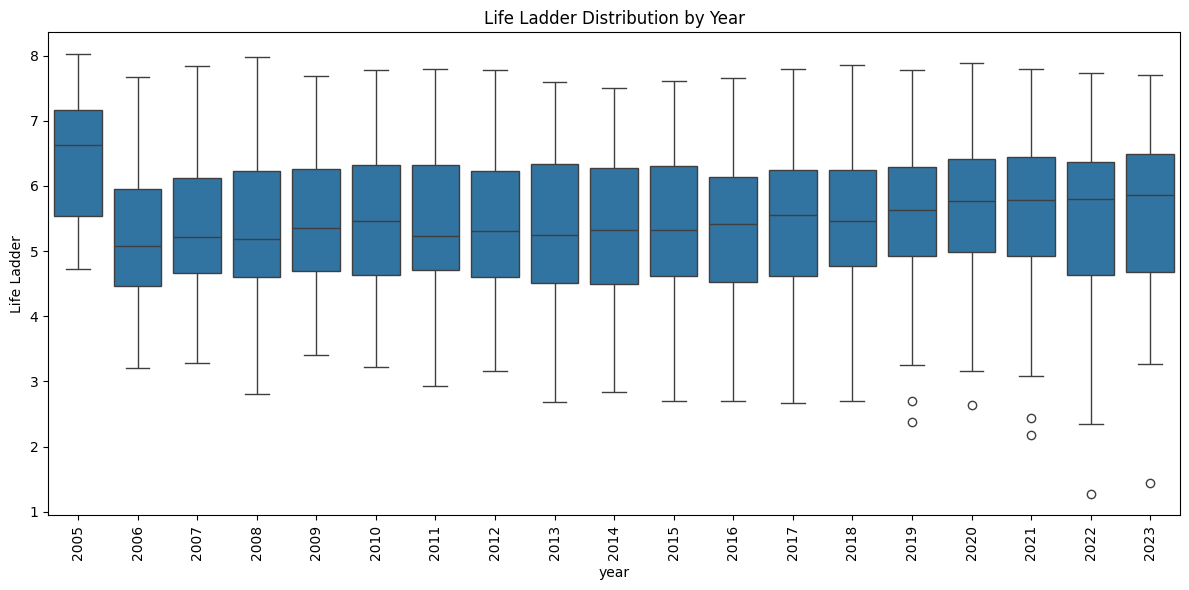

In [9]:
plt.figure(figsize=(12, 6))  # Set figure size for better x-axis label spacing

# Create boxplot to show how generosity scores vary across years
sns.boxplot(x='year', y='Life Ladder', data=df)

# Add plot title
plt.title('Life Ladder Distribution by Year')

# Rotate x-axis labels for clarity
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### **Question 4: Create a heatmap to show correlation between numerical features**
#### Hint: Use df.corr() to calculate correlation matrix, then sns.heatmap()

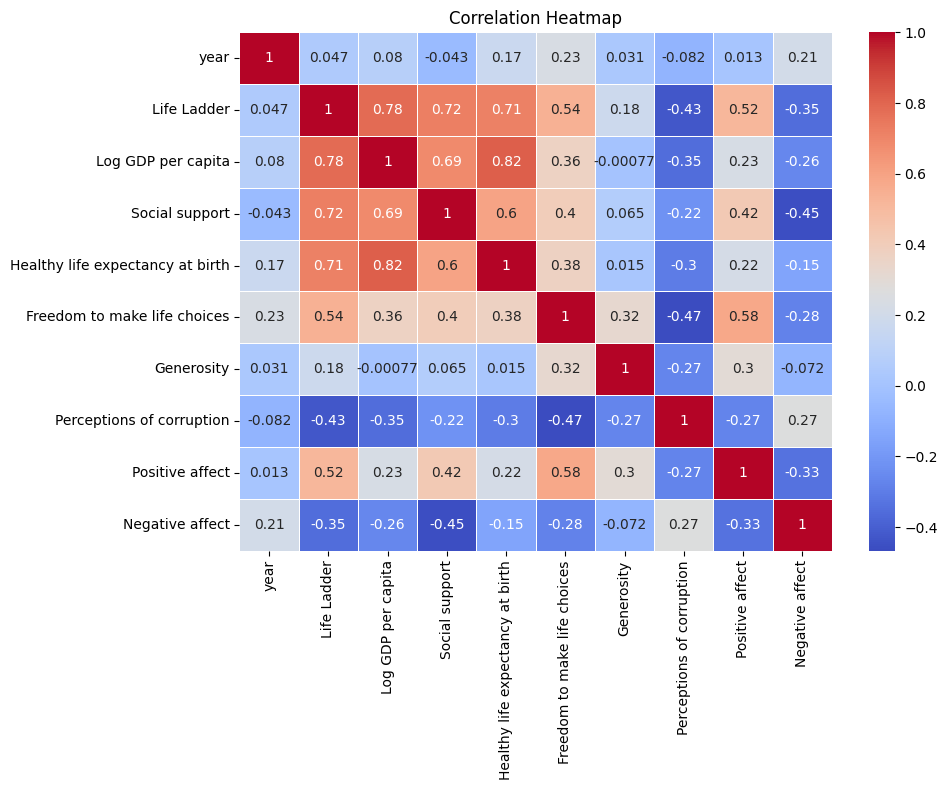

In [11]:
# Compute correlation matrix for the most recent year only
corr = df[df['year'] == df['year']].select_dtypes(include='number').corr()

# Set figure size for better readability
plt.figure(figsize=(10, 8))

# Plot heatmap using Seaborn
sns.heatmap(
    corr, 
    annot=True,          # Display correlation values in each cell
    cmap='coolwarm',     # Use diverging color palette
    linewidths=0.5       # Add space between cells
)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### **Question 5: Create a residual plot for 'Life Ladder' prediction using 'Log GDP per capita'**
#### Hint: Use LinearRegression to predict, then subtract predictions from actuals and plot with plt.scatter()

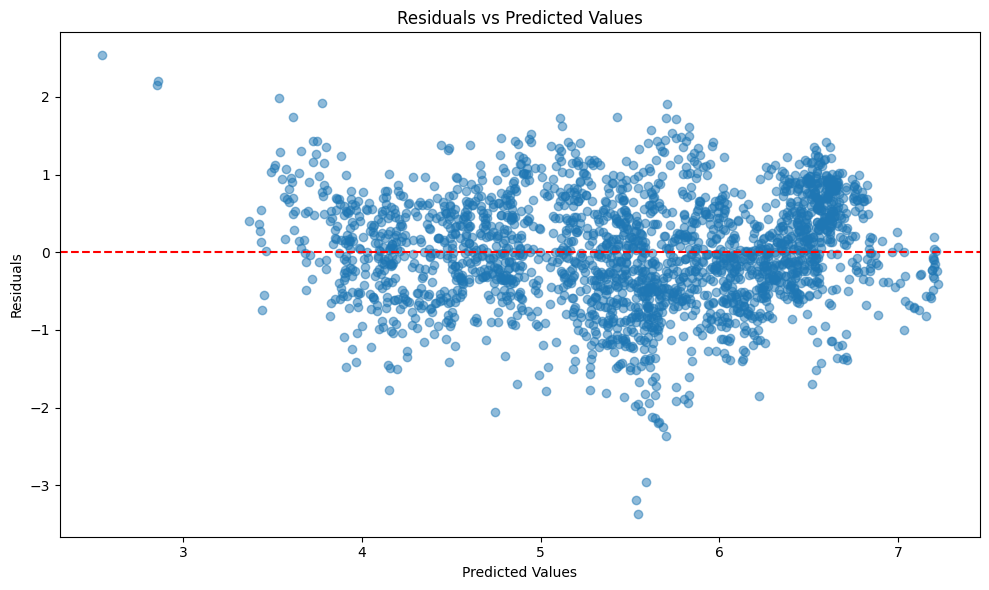

In [ ]:
df_clean = df.dropna(subset=['Log GDP per capita', 'Life Ladder'])

X = df_clean[['Log GDP per capita']]
y = df_clean['Life Ladder']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()

plt.show()

### **Question 6: Create a line plot showing 'Healthy life expectancy at birth' over years for top 5 countries**
#### Hint: Group by 'Country name', take top 5 by average life expectancy, then use sns.lineplot() to show trends over time

int64


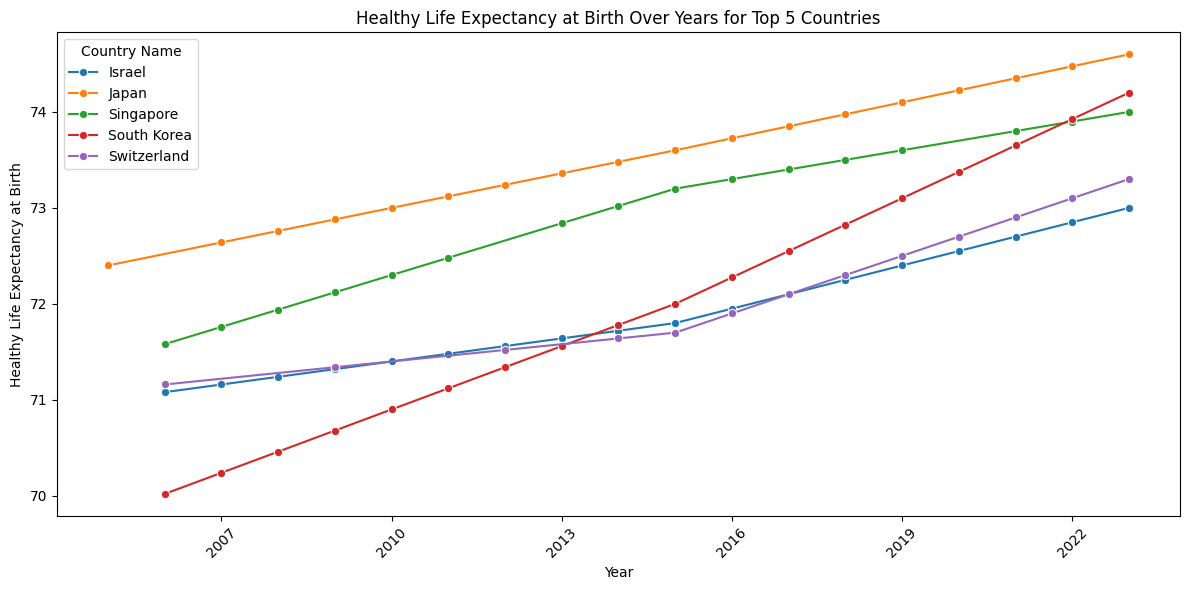

In [39]:
from matplotlib.ticker import FormatStrFormatter, MultipleLocator

average_life_expectancy = df.groupby('Country name')['Healthy life expectancy at birth'].mean()
top_5_countries = average_life_expectancy.nlargest(5).index.tolist()
top_country_data = df[df['Country name'].isin(top_5_countries)]

# print(top_country_data['year'].dtype)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top_country_data,
    x='year',
    y='Healthy life expectancy at birth',
    hue='Country name',
    marker='o'
)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(3))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# if not, x-axis labels will be show as float like 2015.5, 2020.0, that's wierd

plt.title('Healthy Life Expectancy at Birth Over Years for Top 5 Countries')
plt.xlabel('Year')  
plt.ylabel('Healthy Life Expectancy at Birth')
plt.legend(title='Country Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Question 7: Create a bar chart of average 'Social support' for top 10 countries in 2023**
#### Hint: Filter the dataset for 2023, group by 'Country name', then plot the top 10 using bar chart

Country name
Iceland       0.979
Estonia       0.958
Hungary       0.954
Israel        0.952
Norway        0.952
Finland       0.947
Kyrgyzstan    0.946
Slovakia      0.941
Mongolia      0.938
Bulgaria      0.935
Name: Social support, dtype: float64


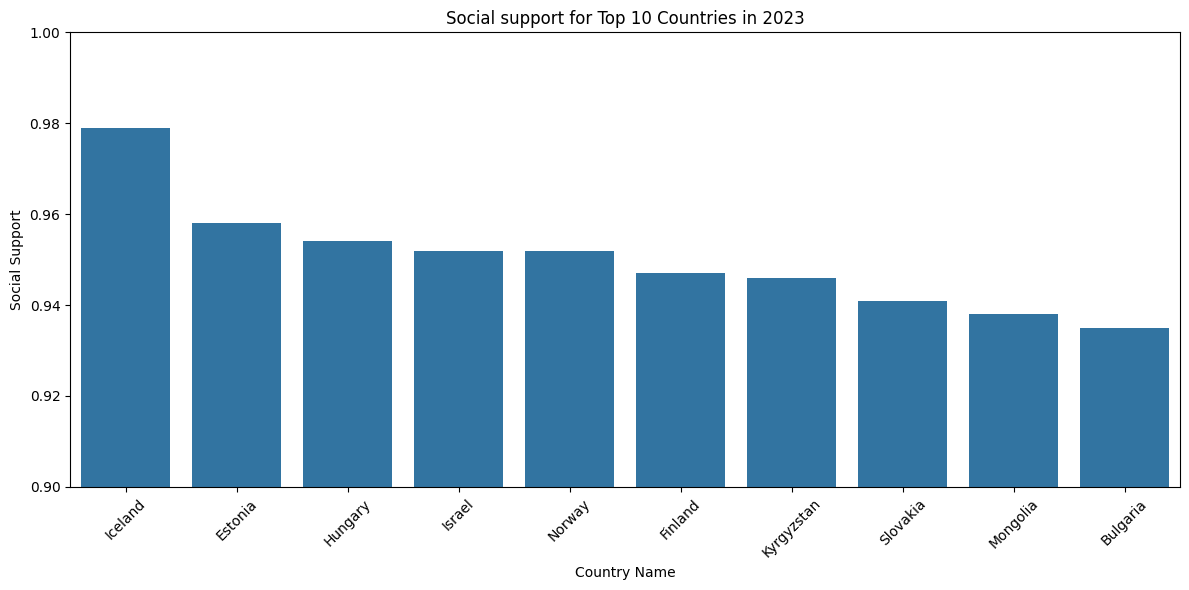

In [59]:
social_support = df[df['year'] == 2023].groupby('Country name')['Social support'].mean()

top_10_countries = social_support.nlargest(10)
#print(social_support)
print(top_10_countries)

# Convert the Series to a DataFrame for compatibility with sns.barplot
top_10_countries_df = top_10_countries.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_countries_df,
    x='Country name',
    y='Social support'
)

plt.title('Social support for Top 10 Countries in 2023')
plt.xlabel('Country Name')  
plt.ylabel('Social Support')
plt.ylim(0.9,1)
# They are all above 0.9, so I set the y-axis limit to 0.9 to 1 for better visualization

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Question 8: Create a pie chart showing proportion of 'Country name' in the dataset (top 10 countries)**
#### Use df['Country name'].value_counts().head(10) and plt.pie() to show the most frequently appearing countries

Country name
Lebanon       18
Jordan        18
Nicaragua     18
Nepal         18
Moldova       18
Mexico        18
Lithuania     18
Kyrgyzstan    18
Kenya         18
Kazakhstan    18
Name: count, dtype: int64


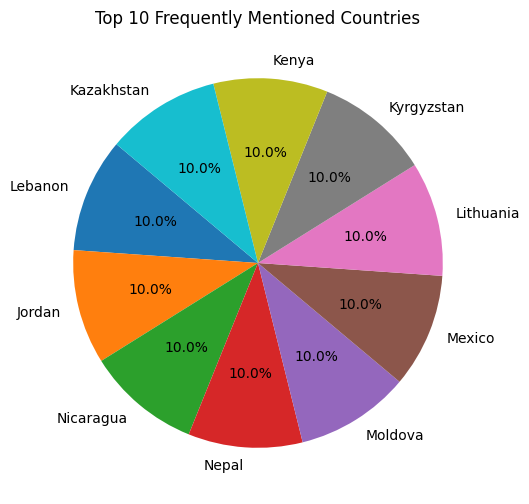

In [71]:
top_frequently_mentioned_countries = df['Country name'].value_counts().nlargest(10)
print(top_frequently_mentioned_countries)

plt.figure(figsize=(12,6))

plt.pie(
  top_frequently_mentioned_countries.values,
  labels =top_frequently_mentioned_countries.index,
  autopct='%1.1f%%',
  startangle=140,
  shadow=False
)

plt.title('Top 10 Frequently Mentioned Countries')
plt.show()

### **Question 9: Perform Linear Regression to predict 'Life Ladder' using multiple predictors**
#### Hint: Use 'Log GDP per capita', 'Social support', and 'Healthy life expectancy at birth' as X variables and fit a model

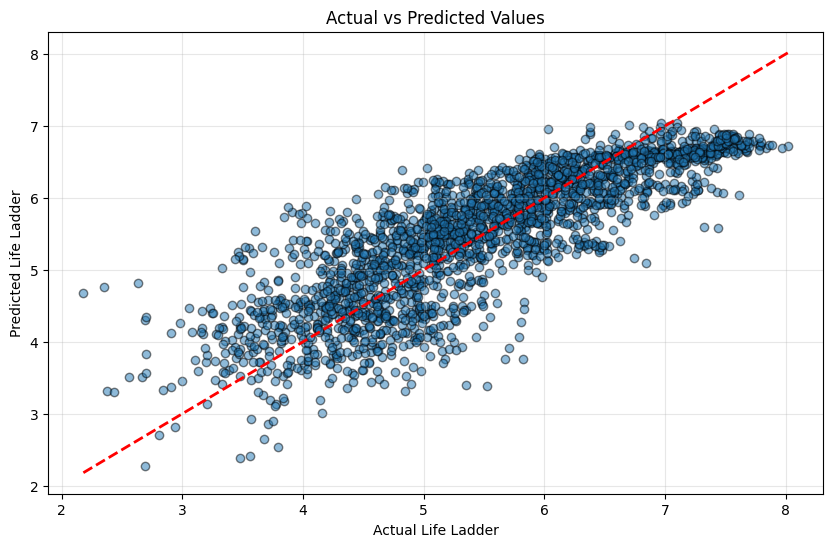

R² Score: 0.69
MSE: 0.39
Regression coefficients: 0.40, 3.06, 0.03


In [4]:
df_clean = df.dropna(subset=['Log GDP per capita', 'Life Ladder', 'Social support','Healthy life expectancy at birth'])

X = df_clean[['Log GDP per capita','Social support','Healthy life expectancy at birth']]
y = df_clean['Life Ladder']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.title('Actual vs Predicted Values')
plt.grid(alpha=0.3)
plt.show()

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"R² Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")
formatted_coefficients = ', '.join([f"{coef:.2f}" for coef in model.coef_])
print(f"Regression coefficients: {formatted_coefficients}")

### **Question 10: Plot residuals from the model above**
#### Hint: Subtract predicted values from actual 'Life Ladder', then plot residuals vs predictions using plt.scatter()

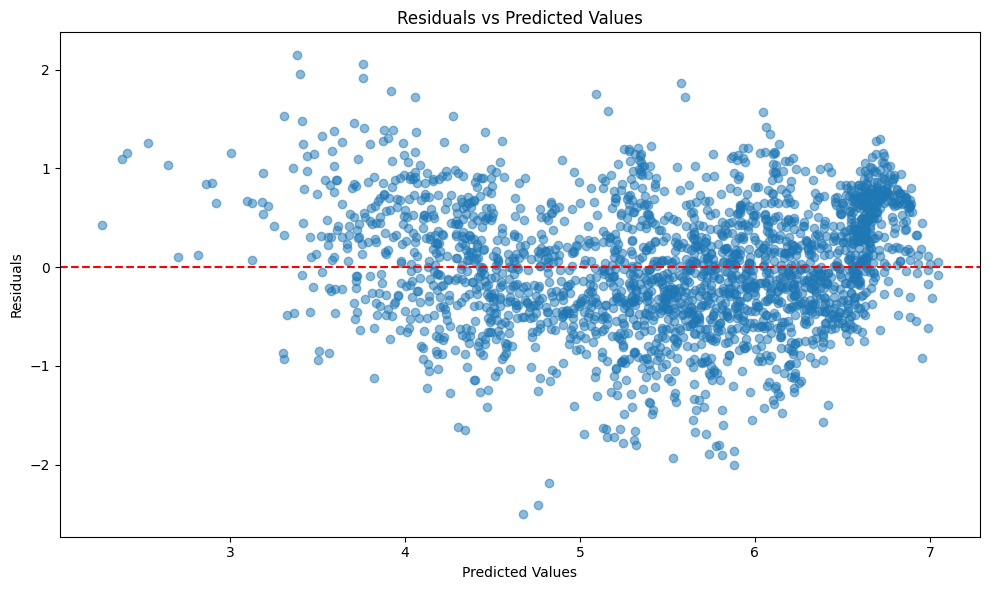

In [3]:
df_clean = df.dropna(subset=['Log GDP per capita', 'Life Ladder', 'Social support','Healthy life expectancy at birth'])

X = df_clean[['Log GDP per capita','Social support','Healthy life expectancy at birth']]
y = df_clean['Life Ladder']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()

Student Name: Yue Zhang
Student ID: 2421832
Email: Yue.Zhang2@metropolia.fi